Google Play Store

Method of Analysis: Clustering

In [1]:
import pandas as pd
df=pd.read_excel("googleplaystore1.xlsx", sheet_name='Sheet1')
df.shape # 33 rows, 7 columns

(33, 7)

In [2]:
df.describe()

,Avg_Rating,Avg_Installs,Avg_Price,Avg_Reviews,Avg_Size,Average of Content Rating
count,33.000000,3.300000e+01,33.000000,3.300000e+01,3.300000e+01,33.000000
mean,4.202142,1.278233e+07,0.771026,3.216342e+05,1.840968e+07,0.845426
std,0.105610,1.823410e+07,1.743722,5.340446e+05,6.876229e+06,0.222331
min,3.970769,1.150269e+05,0.000000,2.515906e+03,8.263273e+06,0.089744
25%,4.131889,1.407444e+06,0.059771,3.115931e+04,1.339413e+07,0.842212
50%,4.192114,5.196348e+06,0.196715,1.781065e+05,1.744001e+07,0.937008
75%,4.277104,1.925611e+07,0.400627,2.691438e+05,2.153810e+07,0.974082
max,4.435556,8.435989e+07,7.925765,2.107138e+06,4.533912e+07,1.000000


In [3]:
df.head()

,Row_Labels,Avg_Rating,Avg_Installs,Avg_Price,Avg_Reviews,Avg_Size,Average of Content Rating
0,ART_AND_DESIGN,4.358065,1.912894e+06,0.091846,26376.000000,1.293966e+07,0.953846
1,AUTO_AND_VEHICLES,4.190411,6.250613e+05,0.158471,13690.188235,2.153810e+07,0.988235
2,BEAUTY,4.278571,5.131519e+05,0.000000,7476.226415,1.551351e+07,0.886792
3,BOOKS_AND_REFERENCE,4.346067,8.318050e+06,0.518485,95060.904762,1.437709e+07,0.896104
4,BUSINESS,4.121452,2.178076e+06,0.402761,30335.982609,1.490042e+07,0.969565


In [4]:
df.isna().sum() # check for missing values

Row_Labels                   0
Avg_Rating                   0
Avg_Installs                 0
Avg_Price                    0
Avg_Reviews                  0
Avg_Size                     0
Average of Content Rating    0
dtype: int64

No missing values.

Exclude the first column, app category name. (Row_Labels)

In [5]:
X = df.iloc[:, 1:] 
X.head()

,Avg_Rating,Avg_Installs,Avg_Price,Avg_Reviews,Avg_Size,Average of Content Rating
0,4.358065,1.912894e+06,0.091846,26376.000000,1.293966e+07,0.953846
1,4.190411,6.250613e+05,0.158471,13690.188235,2.153810e+07,0.988235
2,4.278571,5.131519e+05,0.000000,7476.226415,1.551351e+07,0.886792
3,4.346067,8.318050e+06,0.518485,95060.904762,1.437709e+07,0.896104
4,4.121452,2.178076e+06,0.402761,30335.982609,1.490042e+07,0.969565


No need to create dummies or binarize columns.

Using Euclidean distance. Normalize measures.

In [6]:
from sklearn import preprocessing 

scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

3 clusters total. ART_AND_DESIGN is in cluster 1. FINANCE is in cluster 2

Normalize cluster centers

In [8]:
kmeans.cluster_centers_

array([[-0.56363692,  1.31777923, -0.37450833,  1.49846266,  0.56069994,
        -1.48839771],
       [ 0.20354087, -0.26778772, -0.20279774, -0.31691563, -0.11754876,
         0.31853431],
       [-0.85335014, -0.60599118,  3.65849671, -0.5339426 , -0.21274036,
         0.48351425]])

Useless because negative. Unnormalize cluster centers 

In [9]:
scaler.inverse_transform (kmeans.cluster_centers_)

array([[4.14352585e+00, 3.64439830e+07, 1.27958119e-01, 1.10966192e+06,
        2.22063186e+07, 5.19560720e-01],
       [4.22331016e+00, 7.97401098e+06, 4.22802182e-01, 1.54971174e+05,
        1.76137325e+07, 9.15164422e-01],
       [4.11339650e+00, 1.90132947e+06, 7.05302649e+00, 4.08386871e+04,
        1.69691671e+07, 9.51284582e-01]])

Sum of squared distances of samples to their closest cluster center.

In [10]:
kmeans.inertia_

116.8445503862287

In [11]:
df["Labels"] = kmeans.labels_   # add cluster Labels
df.to_excel("googleplay_label.xlsx") #save to Excel

In [12]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
#create two empty dictionaries
performance_map = {} #intertia
performance_silhouette = {} #silhouette
#measure performance of models with different k values
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    #Record within-cluster sum-of-squares
    performance_map[k] = kmeans.inertia_
    #record Silhouette scores
   
    if k > 1: # has to be greater than 1
        performance_silhouette[k] = silhouette_score(X_scaled, kmeans.labels_)
print(performance_map)

{1: 198.0, 2: 144.24763824306308, 3: 116.8445503862287, 4: 89.36186269530101, 5: 67.07326719353648, 6: 50.13883677190363, 7: 39.84840431992626, 8: 33.758093387482454, 9: 27.42255921503923, 10: 23.911894567887536, 11: 21.804141182859013, 12: 18.56409028190311, 13: 17.623348193180362, 14: 14.368623295818182, 15: 12.603597166050832, 16: 10.752889532540241, 17: 9.356147241095538, 18: 8.192165879876729, 19: 6.962344378195905}


Elbow method to determine clusters

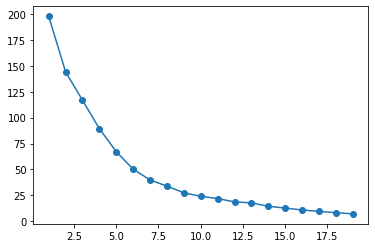

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.scatter(performance_map.keys(),performance_map.values())
plt.plot(list(performance_map.keys()),list(performance_map.values()))
plt.show()

3 is the best because thats when distance stop changing drastically. 

Sihouette method comfirms that 3 is the best values for k

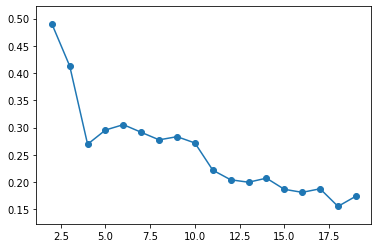

In [14]:
plt.scatter(performance_silhouette.keys(), performance_silhouette.values())
plt.plot(list(performance_silhouette.keys()), list(performance_silhouette.values()))
plt.show()

Scatter Diagrams

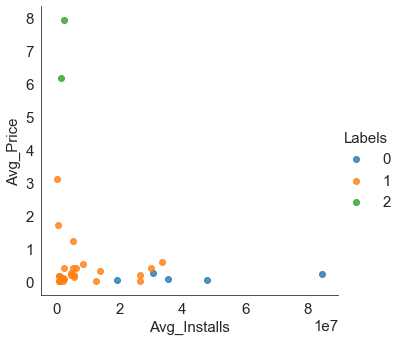

In [15]:
import seaborn as sns
plt.rc('font', size=15) #set font size of labels on matplotlib plots
sns.set_style('white') #set style of plots

facet = sns.lmplot(data=df, x='Avg_Installs', y='Avg_Price', hue='Labels', 
                   fit_reg=False)

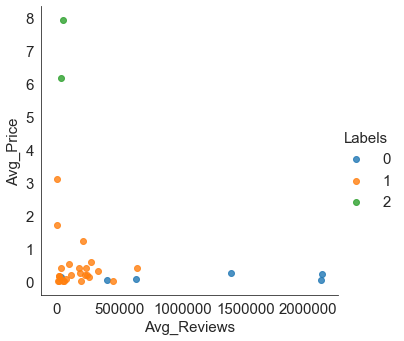

In [16]:
plt.rc('font', size=15)
sns.set_style('white')

facet = sns.lmplot(data=df, x='Avg_Reviews', y='Avg_Price', hue='Labels', 
                   fit_reg=False)

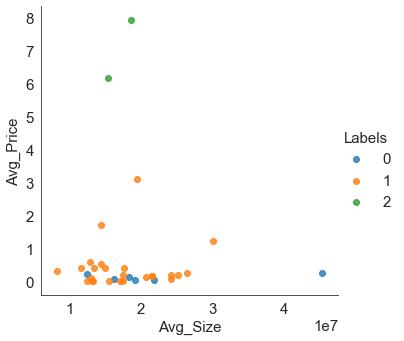

In [17]:
plt.rc('font', size=15)
sns.set_style('white')
facet = sns.lmplot(data=df, x='Avg_Size', y='Avg_Price', hue='Labels', 
                   fit_reg=False)

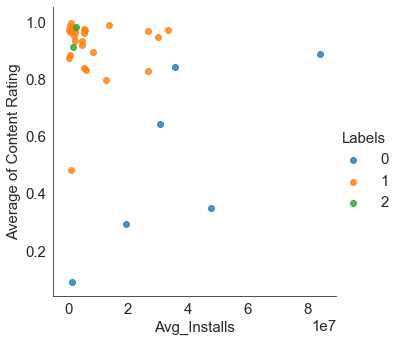

In [18]:
plt.rc('font', size=15)
sns.set_style('white')
facet = sns.lmplot(data=df, x='Avg_Installs', y='Average of Content Rating', hue='Labels', 
                   fit_reg=False)

C:\Users\jenny\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\jenny\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


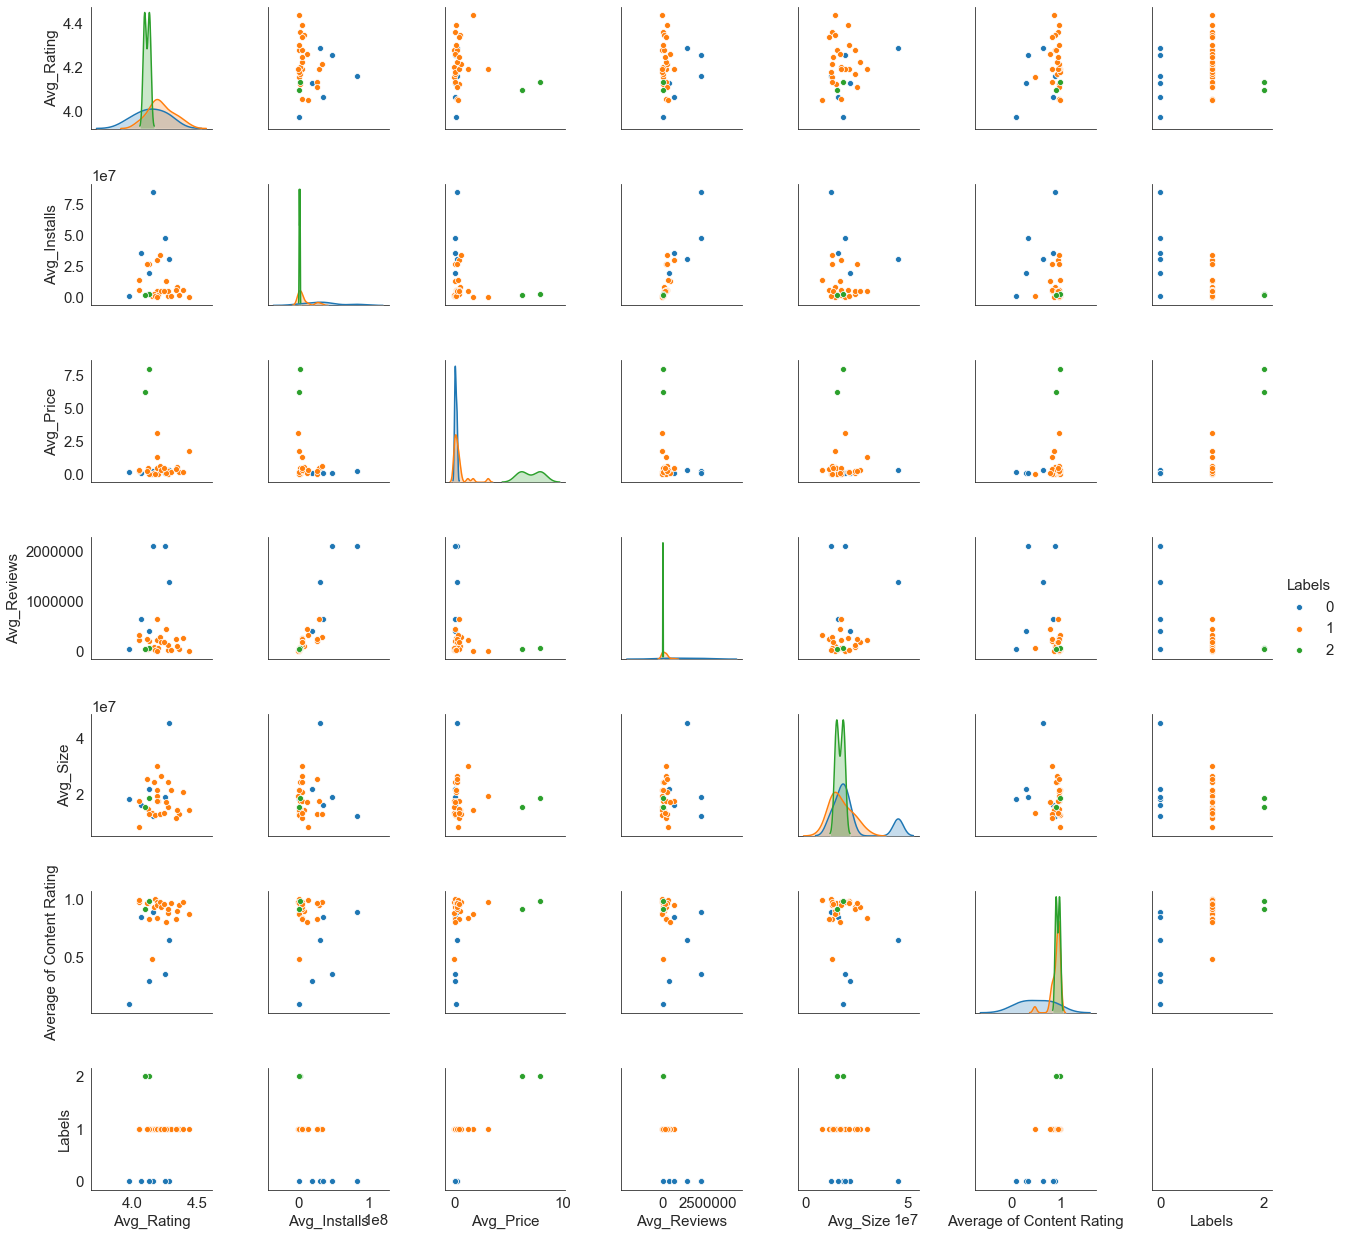

In [19]:
sns.pairplot(df, hue="Labels")  #displays all 

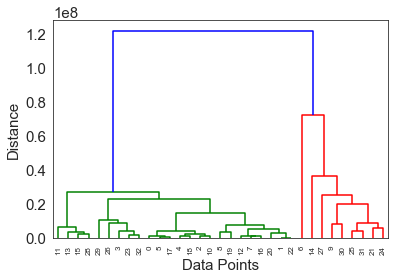

In [20]:
#hierarchical clustering extra 
from scipy.cluster.hierarchy import dendrogram, linkage
 
merg = linkage(X,method="ward")  #ward method, show sum of squared differences between the centroid and each value
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("Data Points")  #each data point
plt.ylabel("Distance")  #measure of distance
plt.show()